The **[Boston Housing Prices Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)** consists of price of houses in various places in Boston.  
Alongside with price, the dataset also provide theses informations : 

 - CRIM: This is the per capita crime rate by town
 - ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft
 - INDUS: This is the proportion of non-retail business acres per town
 - CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
 - NOX: This is the nitric oxides concentration (parts per 10 million)
 - RM: This is the average number of rooms per dwelling
 - AGE: This is the proportion of owner-occupied units built prior to 1940
 - DIS: This is the weighted distances to five Boston employment centers
 - RAD: This is the index of accessibility to radial highways
 - TAX: This is the full-value property-tax rate per 10,000 dollars
 - PTRATIO: This is the pupil-teacher ratio by town
 - B: This is calculated as 1000(Bk — 0.63)^2, where Bk is the proportion of people of African American descent by town
 - LSTAT: This is the percentage lower status of the population
 - MEDV: This is the median value of owner-occupied homes in 1000 dollars
## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Build a model
 - Train the model
 - Evaluate the result


## 1 - Imports

In [22]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plot_keras_history import plot_history

## 2 - Récupérer les données

In [55]:
data = pd.read_csv("../databases/BostonHousing.csv",header=0)
river = pd.read_csv("../databases/HYDROSWOT_100m_acc_clim_lc_beck.csv", sep=";")
display(data.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))
display(river.head(5))
print('Missing Data : ',data.isna().sum().sum(), '  Shape is : ', data.shape)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


,site_no,station_name,lon,lat,flowacc,stage,W,dH,dA,U,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
0,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.331720,196.2912,1.938528,240.439534,0.347472,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,56.916862
1,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.654808,219.4560,2.261616,300.786608,0.667512,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,87.782224
2,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.712720,190.5000,2.319528,312.657294,0.966216,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,529.525031
3,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,6.263640,202.3872,5.870448,1033.768321,1.996440,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,2500.377554
4,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,7.150608,206.0448,6.757416,1220.685874,2.209800,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,3228.120511


Missing Data :  0   Shape is :  (506, 14)


## 3 - Préparation des données

### 3.1 Séparer les données

80% pour train - 20% pour test

x -> input data

y -> expected output

In [90]:

data_river = river.drop(['station_name','flowacc', 'Q5_GSCD','Q10_GSCD','Q20_GSCD','QMEAN_GSCD','Q80_GSCD','Q90_GSCD','Q95_GSCD'],axis=1)

data_river_train = data_river.sample(frac=0.7,axis=0) 
data_river_test = data_river.drop(data_river_train.index)



x_river_train = data_river_train.drop('Q',axis=1)
y_river_train = data_river_train['Q']

x_river_test = data_river_test.drop('Q',axis=1)
y_river_test = data_river_test['Q']

x_river_train.shape

(11780, 25)

In [82]:
# ---- Suffle and Split => train, test

data_train = data.sample(frac=0.7, axis=0) # peut être fait avec n = 'nombre de données voulues'
data_test  = data.drop(data_train.index) # retire les données choisies
display(data_train.head())
# ---- Split => x,y (medv is price)
#
x_train = data_train.drop('medv',  axis=1)
y_train = data_train['medv'] 
x_test  = data_test.drop('medv',   axis=1)
y_test  = data_test['medv']


print('Original data shape was : ',data.shape)
print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94,13.5
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,21.2,392.04,21.32,13.3
317,0.24522,0.0,9.90,0,0.544,5.782,71.7,4.0317,4,304,18.4,396.90,15.94,19.8
184,0.08308,0.0,2.46,0,0.488,5.604,89.8,2.9879,3,193,17.8,391.00,13.98,26.4


Original data shape was :  (506, 14)
x_train :  (354, 13) y_train :  (354,)
x_test  :  (152, 13) y_test  :  (152,)


### 3.2 - Data normalization
**Note :** 
 - All input data must be normalized, train and test.  
 - To do this we will **subtract the mean** and **divide by the standard deviation**.  
 - But test data should not be used in any way, even for normalization.  
 - The mean and the standard deviation will therefore only be calculated with the train data.

In [80]:
display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

display(x_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_train, y_train = np.array(x_train), np.array(y_train)
x_test,  y_test  = np.array(x_test),  np.array(y_test)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,3.82,10.87,11.09,0.07,0.56,6.27,68.49,3.80,9.76,414.12,18.43,360.05,12.69
std,9.36,22.50,6.77,0.26,0.12,0.70,28.21,2.13,8.80,168.02,2.18,87.03,7.21
min,0.01,0.00,1.22,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.13,0.00,0.45,5.88,44.03,2.07,4.00,284.00,17.00,376.60,7.18
50%,0.27,0.00,9.79,0.00,0.54,6.19,77.70,3.23,5.00,345.00,18.90,391.48,11.36
75%,3.70,12.50,18.10,0.00,0.64,6.62,94.05,5.19,24.00,666.00,20.20,396.19,16.86
max,88.98,95.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00,354.00
mean,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.48,-1.46,-0.28,-1.40,-3.88,-2.32,-1.25,-1.00,-1.35,-2.67,-4.13,-1.52
25%,-0.40,-0.48,-0.88,-0.28,-0.88,-0.56,-0.87,-0.81,-0.65,-0.77,-0.66,0.19,-0.76
50%,-0.38,-0.48,-0.19,-0.28,-0.17,-0.11,0.33,-0.27,-0.54,-0.41,0.21,0.36,-0.19
75%,-0.01,0.07,1.03,-0.28,0.72,0.50,0.91,0.65,1.62,1.50,0.81,0.42,0.58
max,9.10,3.74,2.46,3.55,2.65,3.59,1.12,3.92,1.62,1.77,1.63,0.42,3.51


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
72,-0.40,-0.48,-0.04,-0.28,-1.22,-0.30,-2.15,0.70,-0.65,-0.65,0.35,0.35,-0.99
410,5.05,-0.48,1.03,-0.28,0.33,-0.74,1.12,-1.12,1.62,1.50,0.81,-4.11,-0.36
158,-0.26,-0.48,1.25,-0.28,0.40,-0.29,1.12,-0.96,-0.54,-0.07,-1.71,-0.07,-0.87
237,-0.35,-0.48,-0.72,-0.28,-0.43,1.56,0.11,0.17,-0.20,-0.64,-0.47,0.34,-1.10
342,-0.41,-0.48,-1.36,-0.28,-0.33,0.38,-0.31,1.16,-1.00,0.05,-1.16,0.34,-0.56


In [88]:
display(x_river_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

mean = x_river_train.mean()
std  = x_river_train.std()
x_river_train = (x_river_train - mean) / std
x_river_test  = (x_river_test  - mean) / std

display(x_river_train.describe().style.format("{0:.2f}").set_caption("After normalization :"))
display(x_river_train.head(5).style.format("{0:.2f}").set_caption("Few lines of the dataset :"))

x_river_train, y_river_train = np.array(x_river_train), np.array(y_river_train)
x_river_test,  y_river_test  = np.array(x_river_test),  np.array(y_river_test)


,site_no,lon,lat,stage,W,dH,dA,U,clay,sand,silt,PA,TA,LC1,LC2,LC3,LC4,LC5,LC6,LC7,LC8,LC9,LC10,LC11,LC12
count,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11758.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00
mean,355380077065.46,-92.94,40.29,6.72,212.40,2.14,505.54,0.74,21.31,33.91,44.79,922.54,11.21,7.12,0.38,10.17,13.70,2.58,10.54,40.53,0.26,11.60,0.00,0.63,2.48
std,10692141600316.97,12.39,4.94,25.29,190.84,14.41,2131.93,1.19,5.05,11.30,9.73,293.18,4.20,12.14,1.14,16.27,14.65,9.79,9.84,27.13,0.74,19.49,0.00,2.93,3.69
min,1010500.00,-158.19,28.30,-3.95,10.22,0.00,0.00,-1.44,7.07,14.46,12.33,167.44,-6.04,0.00,0.00,0.00,1.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3340500.00,-96.24,37.67,1.58,117.65,0.39,51.42,0.36,18.94,25.89,39.02,758.00,8.94,0.69,0.00,0.39,5.04,0.00,3.88,14.68,0.00,0.00,0.00,0.00,0.53
50%,5558300.00,-92.02,40.72,3.08,160.43,1.10,155.75,0.67,21.59,32.27,45.93,962.44,10.57,2.49,0.08,2.42,7.17,0.42,9.12,41.31,0.00,1.38,0.00,0.00,1.80
75%,6934500.00,-86.77,42.48,5.10,216.41,2.38,408.46,1.05,24.25,41.10,50.82,1129.78,13.59,7.52,0.32,11.23,14.48,1.55,12.14,69.58,0.16,14.02,0.00,0.01,2.97
max,322023090544500.00,-68.15,66.65,1423.42,3291.84,1422.32,183221.79,118.87,44.19,78.91,64.99,1634.44,21.74,87.38,21.26,91.54,75.82,84.03,69.69,93.02,7.23,88.50,0.05,31.96,44.17


,site_no,lon,lat,stage,W,dH,dA,U,clay,sand,silt,PA,TA,LC1,LC2,LC3,LC4,LC5,LC6,LC7,LC8,LC9,LC10,LC11,LC12
count,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11758.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00,11780.00
mean,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.03,-5.27,-2.43,-0.42,-1.06,-0.15,-0.24,-1.83,-2.82,-1.72,-3.33,-2.58,-4.11,-0.59,-0.33,-0.63,-0.85,-0.26,-1.07,-1.49,-0.35,-0.59,-0.09,-0.21,-0.67
25%,-0.03,-0.27,-0.53,-0.20,-0.50,-0.12,-0.21,-0.33,-0.47,-0.71,-0.59,-0.56,-0.54,-0.53,-0.33,-0.60,-0.59,-0.26,-0.68,-0.95,-0.35,-0.59,-0.09,-0.21,-0.53
50%,-0.03,0.07,0.09,-0.14,-0.27,-0.07,-0.16,-0.06,0.06,-0.14,0.12,0.14,-0.15,-0.38,-0.26,-0.48,-0.45,-0.22,-0.14,0.03,-0.35,-0.52,-0.09,-0.21,-0.18
75%,-0.03,0.50,0.44,-0.06,0.02,0.02,-0.05,0.26,0.58,0.64,0.62,0.71,0.57,0.03,-0.05,0.07,0.05,-0.11,0.16,1.07,-0.14,0.12,-0.09,-0.21,0.13
max,30.08,2.00,5.34,56.02,16.14,98.53,85.70,99.00,4.53,3.98,2.08,2.43,2.51,6.61,18.36,5.00,4.24,8.32,6.01,1.93,9.40,3.94,10.75,10.70,11.30


,site_no,lon,lat,stage,W,dH,dA,U,clay,sand,silt,PA,TA,LC1,LC2,LC3,LC4,LC5,LC6,LC7,LC8,LC9,LC10,LC11,LC12
7611,-0.03,-1.90,1.76,0.26,-0.28,-0.07,-0.15,-0.51,-0.10,-0.21,0.29,-0.59,-1.38,0.59,-0.33,-0.51,0.14,0.46,-0.27,0.09,0.33,-0.55,-0.09,1.96,-0.07
10172,-0.03,-0.06,0.27,-0.11,-0.53,-0.08,-0.19,-0.52,0.49,-0.74,0.61,-0.15,-0.37,-0.27,-0.22,-0.54,-0.46,-0.19,-0.23,-1.00,-0.35,2.75,-0.09,-0.21,-0.67
16602,-0.03,-0.34,1.68,-0.08,-0.59,-0.05,-0.18,-0.23,4.53,-1.53,-0.58,-1.53,-1.78,0.49,-0.13,-0.63,-0.47,0.10,-1.02,1.22,0.08,-0.57,-0.09,-0.21,-0.33
2309,-0.03,-0.18,-1.02,-0.19,-0.02,-0.07,-0.13,-0.21,-1.09,0.21,0.33,0.76,1.13,-0.54,-0.33,-0.40,0.67,-0.18,2.12,-0.14,-0.35,-0.59,-0.09,-0.21,0.25
16173,-0.03,0.12,0.23,-0.16,-0.43,-0.07,-0.19,-0.02,0.22,-0.98,1.02,0.01,-0.29,-0.59,-0.25,-0.48,-0.72,-0.26,0.36,1.46,-0.35,-0.59,-0.09,-0.21,-0.63


# Step 4 - Build a model
About informations about : 
 - [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
 - [Activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
 - [Loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [5]:
def get_model_v1(shape):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape, name="InputLayer"))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n1')) # 32 -> nombre de neuronnes
    model.add(keras.layers.Dense(64, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(32, activation='relu', name='Dense_n3'))
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'adam', 
                  loss      = 'mse',
                  metrics   = ['mae', 'mse'] )
    return model

## Step 5 - Train the model
### 5.1 - Get it

In [93]:
model_river = get_model_v1((25,))
model_river.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 32)                832       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                2112      
_________________________________________________________________
Dense_n3 (Dense)             (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [6]:
model=get_model_v1( (13,) ) # 14 moins le prix donc 13 

model.summary()

#img=keras.utils.plot_model( model, to_file='./run/model.png', show_shapes=True, show_layer_names=True, dpi=96)
#display(img)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_n1 (Dense)             (None, 32)                448       
_________________________________________________________________
Dense_n2 (Dense)             (None, 64)                2112      
_________________________________________________________________
Dense_n3 (Dense)             (None, 32)                2080      
_________________________________________________________________
Output (Dense)               (None, 1)                 33        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


### 5.2 Train it

In [7]:
history = model.fit(x_train,
                    y_train,
                    epochs          = 60,
                    batch_size      = 10,
                    verbose         = 0,
                    validation_data = (x_test, y_test))

In [95]:
history_river = model_river.fit(x_river_train,
                    y_river_train,
                    epochs          = 60,
                    batch_size      = 10,
                    verbose         = 1,
                    validation_data = (x_river_test, y_river_test))

Train on 11780 samples, validate on 5048 samples
Epoch 1/60
11780/11780 [==============================] - 5s 383us/sample - loss: nan - mean_absolute_error: nan - mean_squared_error: nan - val_loss: nan - val_mean_absolute_error: nan - val_mean_squared_error: nan
Epoch 2/60
11780/11780 [==============================] - 4s 362us/sample - loss: nan - mean_absolute_error: nan - mean_squared_error: nan - val_loss: nan - val_mean_absolute_error: nan - val_mean_squared_error: nan
Epoch 3/60
11780/11780 [==============================] - 5s 412us/sample - loss: nan - mean_absolute_error: nan - mean_squared_error: nan - val_loss: nan - val_mean_absolute_error: nan - val_mean_squared_error: nan
Epoch 4/60
11780/11780 [==============================] - 6s 470us/sample - loss: nan - mean_absolute_error: nan - mean_squared_error: nan - val_loss: nan - val_mean_absolute_error: nan - val_mean_squared_error: nan
Epoch 5/60
11780/11780 [==============================] - 4s 341us/sample - loss: nan -

KeyboardInterrupt: 

## Step 6 - Evaluate
### 6.1 - Model evaluation
MAE =  Mean Absolute Error (between the labels and predictions)  
A mae equal to 3 represents an average error in prediction of $3k.

In [ ]:
score = model_river.evaluate(x_river_test, y_river_test, verbose=1)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

In [8]:
score = model.evaluate(x_test, y_test, verbose=1)

print('x_test / loss      : {:5.4f}'.format(score[0]))
print('x_test / mae       : {:5.4f}'.format(score[1]))
print('x_test / mse       : {:5.4f}'.format(score[2]))

152/152 [==============================] - 0s 111us/sample - loss: 10.9557 - mean_absolute_error: 2.4292 - mean_squared_error: 10.9557
x_test / loss      : 10.9557
x_test / mae       : 2.4292
x_test / mse       : 10.9557


### 6.2 - Training history
What was the best result during our training ?

In [ ]:
df=pd.DataFrame(data=history.history)
display(df.head().style.format("{0:.2f}").set_caption("Début du training:"))
display(df.tail().style.format("{0:.2f}").set_caption("Fin du training :"))

In [9]:
df=pd.DataFrame(data=history.history)
display(df.head().style.format("{0:.2f}").set_caption("Début du training:"))
display(df.tail().style.format("{0:.2f}").set_caption("Fin du training :"))

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,547.94,21.57,547.94,419.17,18.47,419.17
1,275.60,14.12,275.60,112.22,8.26,112.22
2,79.06,6.90,79.06,63.79,6.17,63.79
3,46.38,5.32,46.38,42.08,4.87,42.08
4,33.19,4.40,33.19,32.10,4.10,32.10


,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
55,6.66,1.89,6.66,10.50,2.30,10.50
56,6.01,1.78,6.01,11.15,2.35,11.15
57,6.02,1.79,6.02,10.54,2.30,10.54
58,5.97,1.78,5.97,10.58,2.34,10.58
59,6.01,1.78,6.01,10.96,2.43,10.96


In [10]:
print("min( val_mae ) : {:.4f}".format( min(df["val_mean_absolute_error"]) ) )

min( val_mae ) : 2.2957


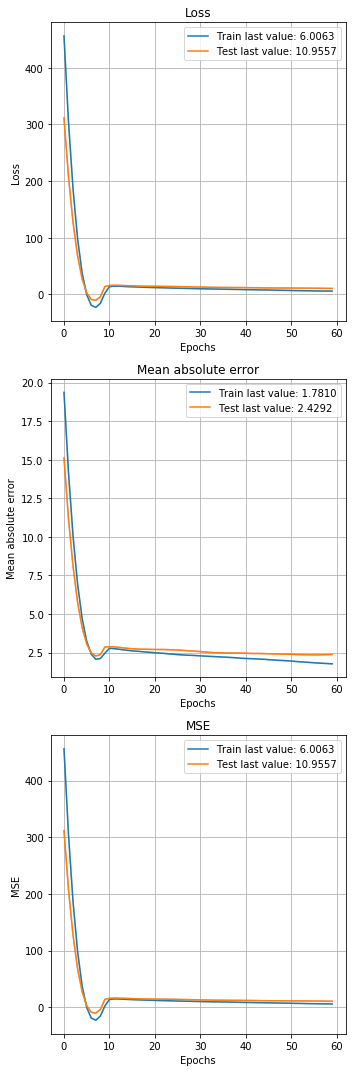

In [11]:
plot_history(df , style="-" , interpolate = True , graphs_per_row = 1)

## Step 7 - Make a prediction
The data must be normalized with the parameters (mean, std) previously used.

In [12]:
my_data = [ 1.26425925, -0.48522739,  1.0436489 , -0.23112788,  1.37120745,
       -2.14308942,  1.13489104, -1.06802005,  1.71189006,  1.57042287,
        0.77859951,  0.14769795,  2.7585581 ]

real_price = 10.4

my_data=np.array(my_data).reshape(1,13)

In [13]:
predictions = model.predict( my_data )


print("Prediction : {:.2f} K$".format(predictions[0][0]))
print("Reality    : {:.2f} K$".format(real_price))

Prediction : 11.23 K$
Reality    : 10.40 K$


In [14]:
print("Weights and biases of the layers after training the model: \n")
for layer in model.layers:
    print("Layer : " , layer.name)
    print("Weights : ",layer.get_weights()[0].shape)
    print(layer.get_weights()[0])
    print("Bias")
    print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

Weights and biases of the layers after training the model: 

Layer :  Dense_n1
Weights :  (13, 32)
[[-2.43336603e-01 -1.73631757e-01  9.66204926e-02 -1.89306349e-01
  -3.45783606e-02 -4.17390049e-01 -6.38498440e-02 -2.94883430e-01
  -3.48091088e-02 -1.00845382e-01 -3.56184632e-01 -4.23262864e-01
   1.31201446e-01 -1.25120118e-01  1.28241554e-01 -1.00839615e-01
  -3.97351414e-01 -2.22179174e-01  3.07217725e-02 -1.25788257e-01
  -1.15350418e-01  3.05540916e-02 -3.80414873e-02 -2.91110992e-01
  -1.75158337e-01 -1.74690112e-01  1.49758160e-01 -7.39782229e-02
   6.46512881e-02  9.34879296e-03  1.45724993e-02 -4.81609046e-01]
 [-1.17777940e-03 -2.05446273e-01 -5.40171303e-02 -4.16597158e-01
  -8.46696496e-02  5.42494096e-03 -1.60741121e-01 -1.90043181e-01
  -3.62149954e-01 -2.96181440e-01  2.61059105e-01 -1.65223777e-01
   7.25780576e-02  2.23124828e-02  2.77246326e-01  9.57136154e-02
  -1.05026141e-01  1.87602013e-01  2.29526356e-01 -1.87004730e-01
  -3.83160442e-01  1.20833024e-01 -2.88218

## Autre - exemple d'ANN

In [46]:
x = np.random.randn(100)
y = x*2+np.random.randn(100)*0.8

In [49]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(4, input_dim=1, activation='linear', name='Layer_1')) # 32 -> nombre de neuronnes
model1.add(keras.layers.Dense(1, activation='linear', name='layer_2'))
    
model1.compile(optimizer = 'sgd', 
                  loss      = 'mse',
                  metrics   = ['mse'] )

In [50]:
model1.fit(x,y, batch_size = 1, epochs = 10, shuffle = False)

Epoch 1/10
100/100 [==============================] - 0s 3ms/sample - loss: 1.6164 - mean_squared_error: 1.6164
Epoch 2/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.7232 - mean_squared_error: 0.7232
Epoch 3/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.7223 - mean_squared_error: 0.7223
Epoch 4/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.7215 - mean_squared_error: 0.7215
Epoch 5/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.7208 - mean_squared_error: 0.7208
Epoch 6/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.7201 - mean_squared_error: 0.7201
Epoch 7/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.7195 - mean_squared_error: 0.7195
Epoch 8/10
100/100 [==============================] - ETA: 0s - loss: 0.6960 - mean_squared_error: 0.69 - 0s 2ms/sample - loss: 0.7190 - mean_squared_error: 0.7190
Epoch 9/10
100/100 [==============================] 

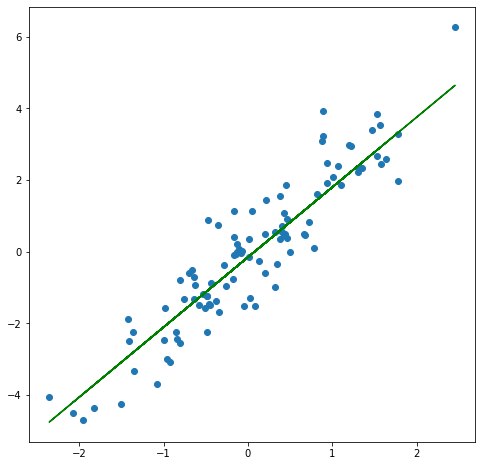

In [51]:
plt.figure(figsize = (8,8))
plt.plot(x,y,'o')
plt.plot(x,model1.predict(x),'g')
plt.show()